# 大数据分析
## 第一次作业

## 1. Recall and write down the assumptions which one-way ANOVA are based on.

1. 数据是随机抽样,且各因变量个案彼此独立
2. 组间的方差差异不大
3. 数据符合正态分布

## 2.  Focus on two columns: Category (Col[2]) and Average Age (Col[7]). Taking feature Average Age as an example, we want to measure whether the average age varied significantly across the categories. Clearly state the null (H0) and the alternative (H1) hypotheses for this task.

1. H0:各组平均年龄总体均数相等
2. H1:各组平均年龄总体均数不相等或不全相等

__为接下来的分析进行数据准备__

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm

#读取数据
df = pd.read_csv('/ml/homework1/data_utf8.csv')
print '数据种类:',df.columns
print '数据总量:',len(df)

数据种类: Index([u'群名', u'群类别', u'群人数', u'消息数', u'稠密度', u'性别比', u'平均年龄', u'年龄差',
       u'地域集中度', u'手机比例', u'会话数', u'无回应比例', u'夜聊比例', u'图片比例'],
      dtype='object')
数据总量: 2040


## 3. a）Draw the empirical probability density funfction of Col[7], i.e. the empirical pdf of average age. Does the data in this dimension follow Gaussian distribution? Test normality of Col[7]

mean: 27.2220125432
std : 4.98657029311


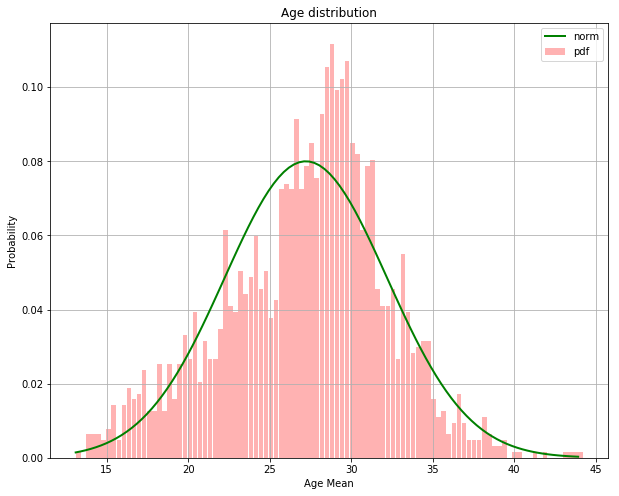

In [79]:
df_age = df['平均年龄']
age_mean = df_age.mean()
age_std = df_age.std()
print 'mean:',age_mean
print 'std :',age_std

size = 100
#按1的粒度切分数据进行分析
x = np.arange( df_age.min() , df_age.max() , (df_age.max() - df_age.min()) / size )
#计算正态分布pdf
y = norm.pdf( x, age_mean, age_std)

#绘图进行初步观察
plt_age = plt
plt_age.figure(figsize=(10,8))
#参数 颜色 线宽
plt_age.plot( x , y , color = 'green' , linewidth = 2 , label='norm' )
#数据 数组 颜色 颜色深浅 组宽 显示频率
plt_age.hist( df_age , bins = size , color = 'red' , alpha = 0.3 , rwidth = 0.9 , normed = True , label='pdf' )
plt_age.title('Age distribution')
plt_age.xlabel('Age Mean')
plt_age.ylabel('Probability')
plt_age.grid( True )
plt_age.legend()
plt_age.show()

__使用Q-Q进行定性分析,使用ks检验进行定量分析__

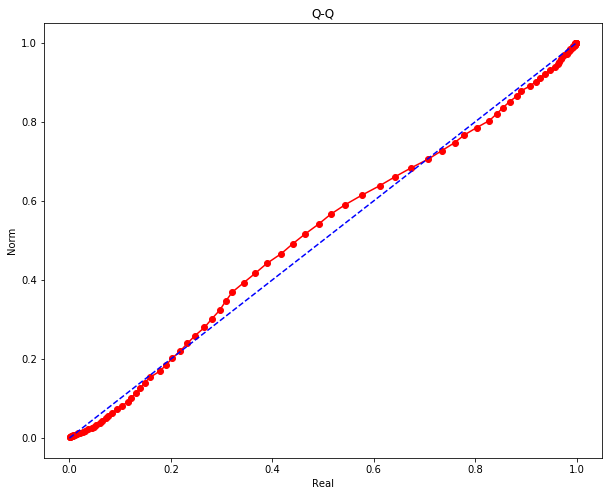

拒绝H0：( 8.01234271375e-06 < 0.05 ) 分布不符合正态分布


In [80]:
#绘制Q-Q图定性检验是否符合正态分布
#实际统计频率
xp = []
for i in range(len(x)):
    p = df_age[df_age<=x[i]]
    xp.append( len(p) * 1.0 / len(df_age) )
xp = np.array(xp)

#正态分布累计概率
yp = norm.cdf( x, age_mean, age_std)

#绘图查看结果
plt_QQ = plt
plt_QQ.figure(figsize=(10,8))
plt_QQ.plot( xp , yp , 'ro-' )
plt_QQ.plot( [0,1] , [0,1] , 'b--' )
plt_QQ.title('Q-Q')
plt_QQ.xlabel('Real')
plt_QQ.ylabel('Norm')
plt_QQ.show()

w,p = stats.kstest(df_age, 'norm',args=(age_mean, age_std))

if p < 0.05:
    print '拒绝H0：( ' + str(p) + ' < 0.05 )' + ' 分布不符合正态分布'
else:
    print '接受H0：( ' + str(p) + ' > 0.05 )' + ' 分布符合正态分布'

__由上述Q-Q图定性分析和ks检验定量分析，可以定性认定Col[7]（平均年龄）分布不符合正态分布__

## 3. b）In Col[7], there are 5 components divided by category labels. We denote the data in Col[7] with category i (where i = 1,…,5) as Col[7|categoty=i]. Test the normality of each components and test the homogeneity of variances.


第1组:
mean: 23.4042779593
std : 4.92375713739
var : 24.243384348
p-value: 0.271088788744


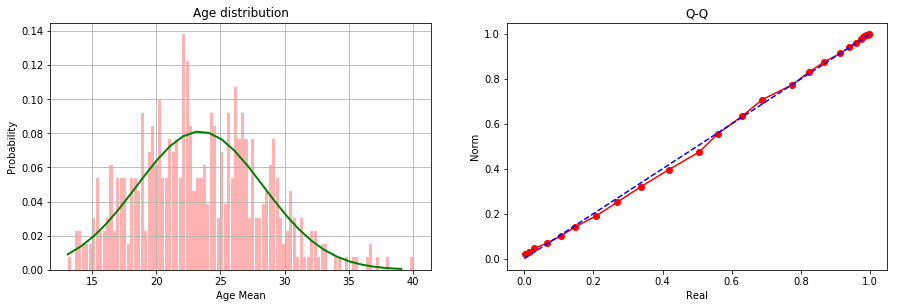

----------------------------------------------------------------------
第2组:
mean: 29.6181934963
std : 5.21737087936
var : 27.2209588928
p-value: 0.591578871998


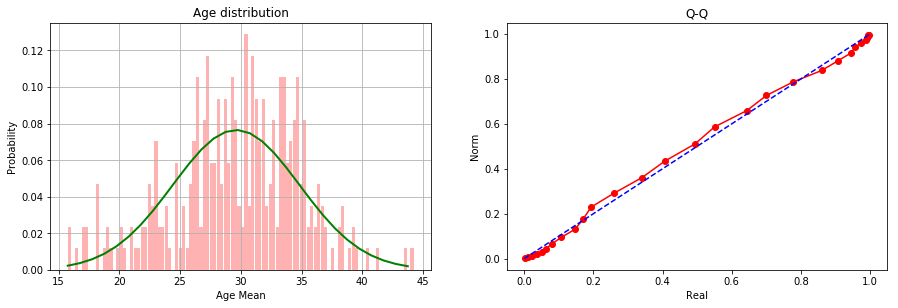

----------------------------------------------------------------------
第3组:
mean: 30.7915340161
std : 2.55290128692
var : 6.51730498073
p-value: 0.749231763176


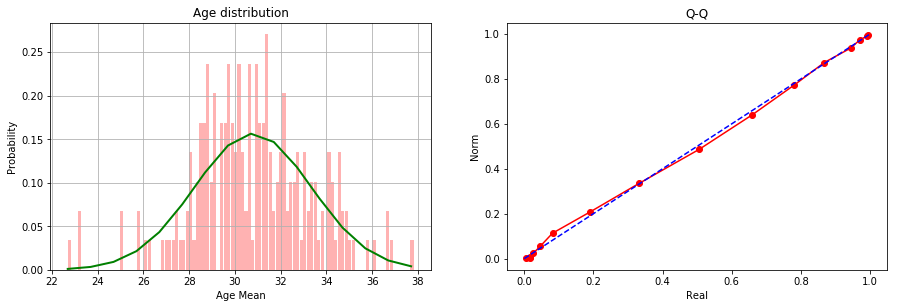

----------------------------------------------------------------------
第4组:
mean: 26.255317865
std : 5.09825586997
var : 25.9922129157
p-value: 0.0190132170977


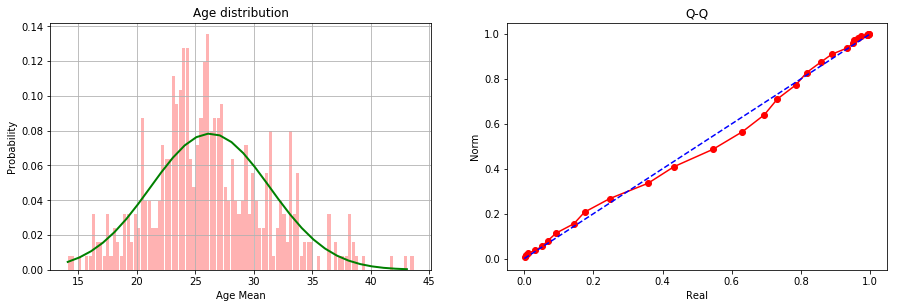

----------------------------------------------------------------------
第5组:
mean: 28.5450807042
std : 3.01897880509
var : 9.11423302558
p-value: 0.000404805129485


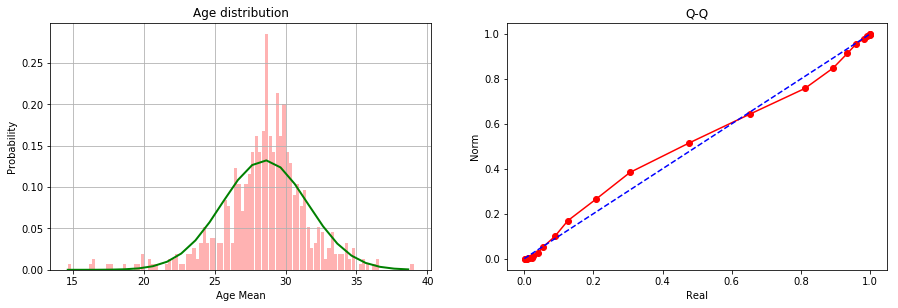

----------------------------------------------------------------------


In [81]:
size = 100

def run_for_3b_sub(cur_df):
    age_mean = cur_df.mean()
    age_std = cur_df.std()
    age_var = cur_df.var(ddof=1)
    print 'mean:',age_mean
    print 'std :',age_std
    print 'var :',age_var

    #按1的粒度切分数据进行分析
    x = np.arange( cur_df.min() , cur_df.max() , 1 )
    #计算正态分布pdf
    y = norm.pdf( x, age_mean, age_std)

    plt.figure(figsize=(15,10))
    
    plt.subplot(2,2,1)
    #参数 颜色 线宽
    plt.plot( x , y , color = 'green' , linewidth = 2 )
    #数据 数组 颜色 颜色深浅 组宽 显示频率
    plt.hist( cur_df , bins = size , color = 'red' , alpha = 0.3 , rwidth = 0.9 , normed = True )
    plt.title('Age distribution')
    plt.xlabel('Age Mean')
    plt.ylabel('Probability')
    plt.grid( True )
    
    #绘制Q-Q图定性检验是否符合正态分布
    #实际统计频率
    xp = []
    for i in range(len(x)):
        p = cur_df[cur_df<=x[i]]
        xp.append( len(p) * 1.0 / len(cur_df) )
    xp = np.array(xp)

    #正态分布累计概率
    yp = norm.cdf( x, age_mean, age_std)
    
    w,p = stats.kstest(cur_df, 'norm',args=(age_mean, age_std))
    print 'p-value:',p

    plt.subplot(2,2,2)
    #绘图查看结果
    plt.plot( xp , yp , 'ro-' )
    plt.plot( [0,1] , [0,1] , 'b--' )
    plt.title('Q-Q')
    plt.xlabel('Real')
    plt.ylabel('Norm')
    plt.show()
    pass

#计算各组数据
df_age_c = {}
for i in range(1,6):
    print '第' + str(i) + '组:'
    df_age_c[i] = df[df['群类别']==i]['平均年龄']
    run_for_3b_sub(df_age_c[i])
    print '----------------------------------------------------------------------'

__由图片观察及ks检验结果得出：第4，5组不符合正态分布，下面进行齐性分析__

In [7]:
#方差齐性分析
args = []
for key in df_age_c:
    args.append(df_age_c[key])

#检验方差齐性
w,p = stats.levene(*args)
if p < 0.05:
    print '拒绝H0：方差不齐( ' + str(p) + ' < 0.05 )'
else:
    print w,p

拒绝H0：方差不齐( 9.6773551815e-49 < 0.05 )


__得出结论，部分组不符合正态分布，且方差齐性分析显示方差不齐__

## 3. c）Do the one-way ANOVA test for Col[7] with categories in Col[2]. Write down your conclusion, supporting statistics, and visualize your data which inspire the process

__根据上述结果得知，本例中采样各组不完全符合正态分布且方差不齐，偏差过大，所以one-way ANOVA采用Kruskal Wallis H test方案进行__

In [82]:
w,p = stats.kruskal(*args)
if p < 0.05:
    print '拒绝H0：( ' + str(p) + ' < 0.05 )'
else:
    print '接受H0：( ' + str(p) + ' )'

拒绝H0：( 1.93074759749e-116 < 0.05 )


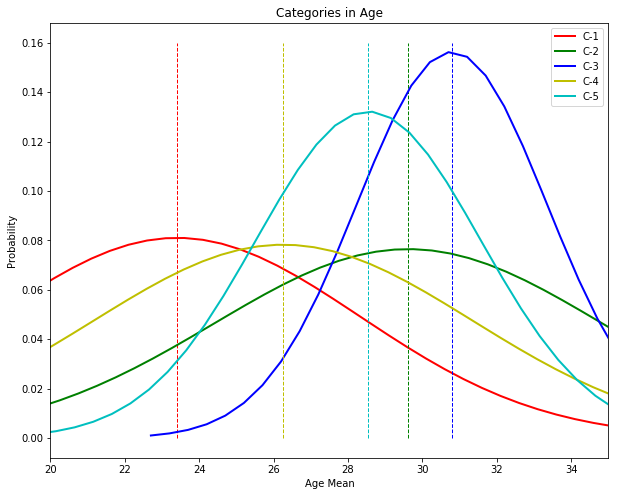

In [83]:
plt_age = plt
plt_age.figure(figsize=(10,8))
for key in df_age_c:
    curdf = df_age_c[key]
    mean = curdf.mean()
    std = curdf.std()
    x = np.arange( curdf.min() , curdf.max() , 0.5 )
    y = norm.pdf( x, mean, std)
    plt_age.plot( x , y , color = 'rgbyc'[key-1] , linewidth = 2 , label='C-' + str(key) )
    plt_age.plot( [mean,mean] , [0,0.16] , color = 'rgbyc'[key-1] , linestyle='--' , linewidth = 1 )

plt_age.title('Categories in Age')
plt_age.xlabel('Age Mean')
plt_age.ylabel('Probability')
plt_age.xlim(20,35)
plt_age.legend()
plt_age.show()

__由Kruskal Wallis H test方案得出结论：拒绝H0假设，各组平均年龄均值不完全相等，即分组对于年龄分布存在影响__

## 4. Choose another 3 columns, draw the empirical pdf of each feature columns and test which column follows these assumptions in question 1? How about their corresponding log transformation?

__首先测试各分组是否符合正态分布;__    
__选择$[性别比] [无回应比例] [地域集中度]$三个列进行测试分析__    

----------------------------------------------------------------------
[性别比] PDF图绘制及正态性符合测试


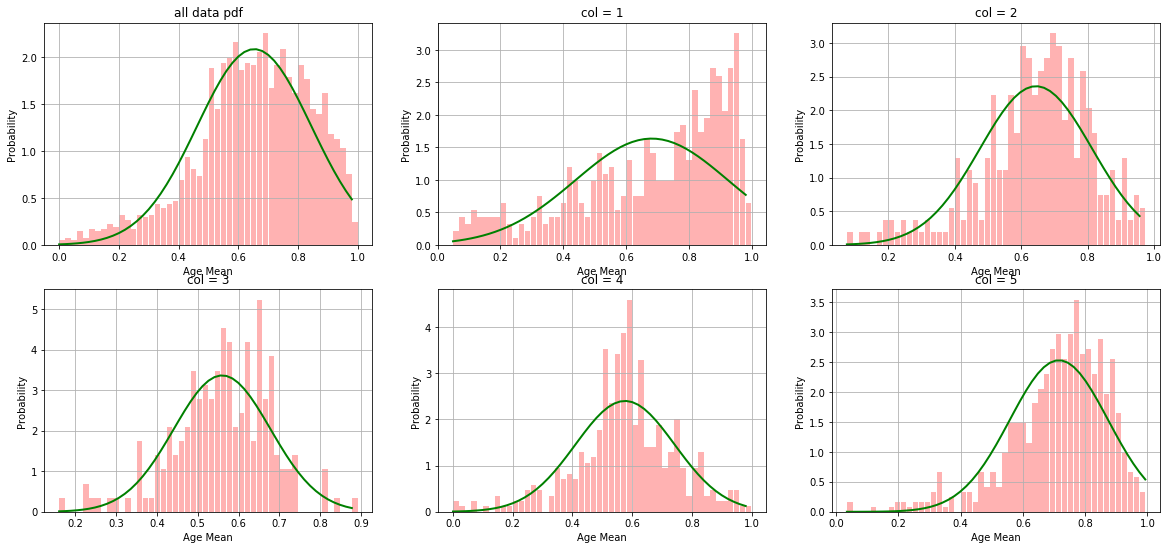

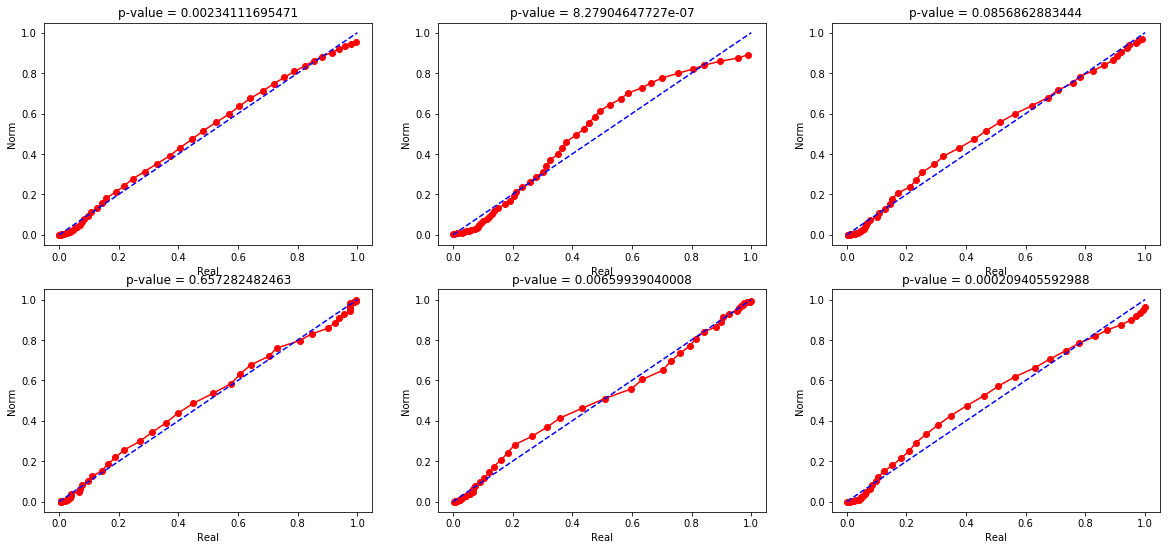

----------------------------------------------------------------------
[无回应比例] PDF图绘制及正态性符合测试


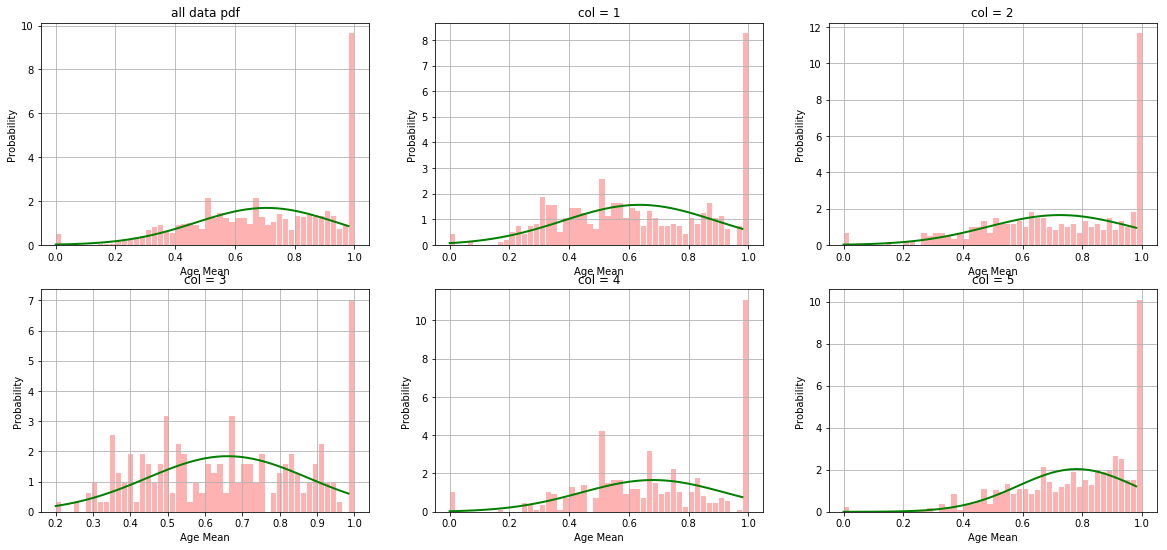

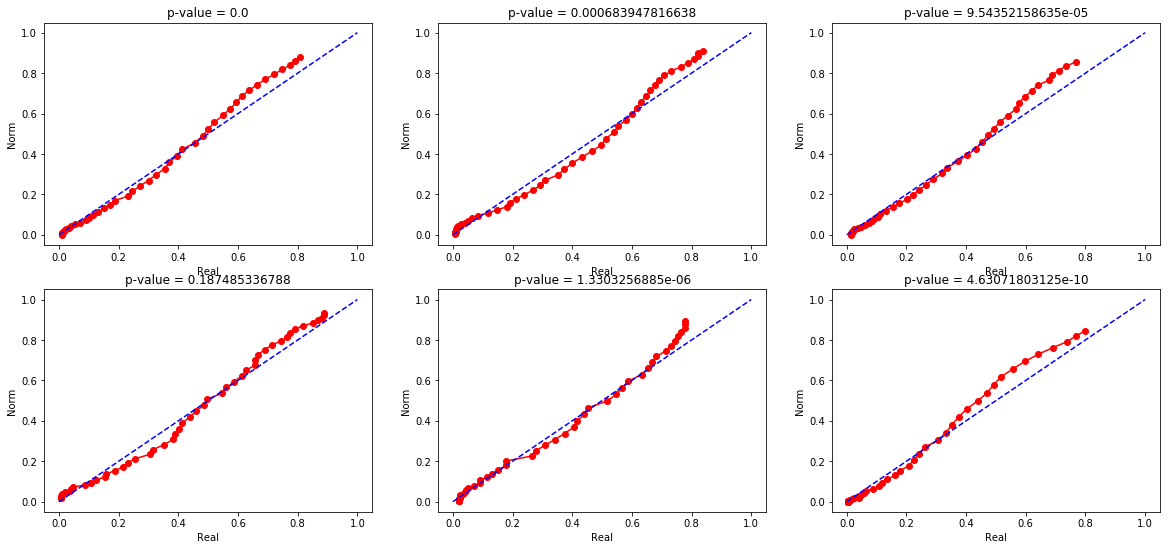

----------------------------------------------------------------------
[地域集中度] PDF图绘制及正态性符合测试


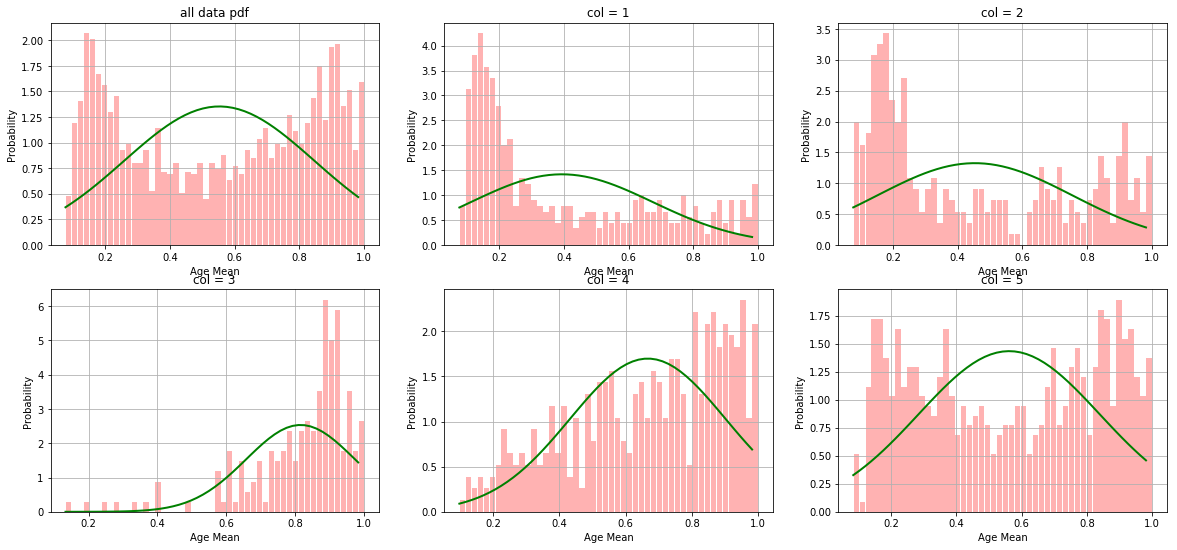

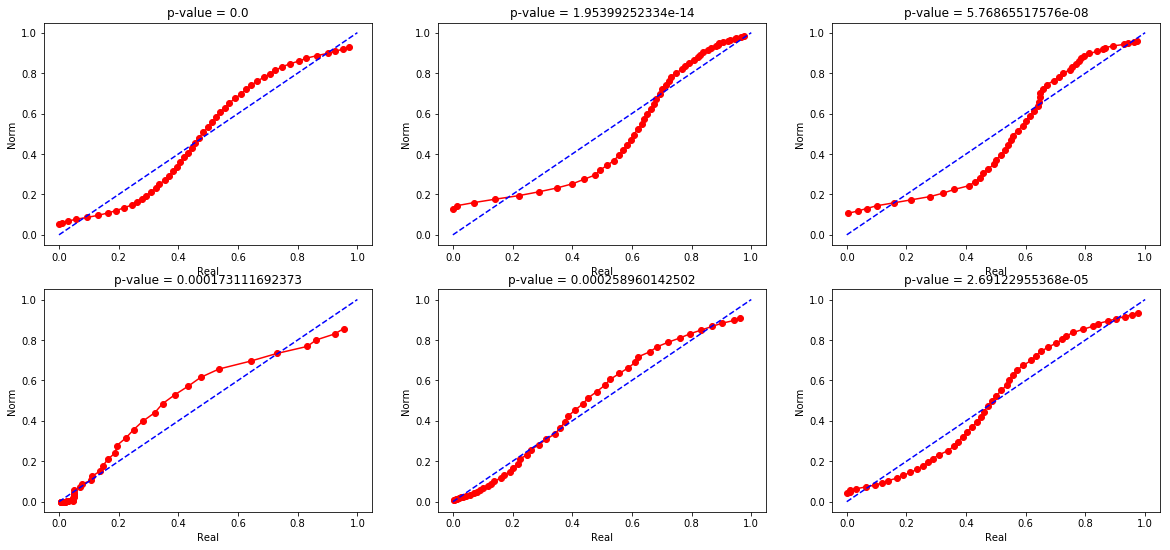

In [106]:
def show_data_pdf(plt_pdf,data,size):
    mean = data.mean()
    std = data.std()

    x = np.arange( data.min() , data.max() , (data.max()-data.min()) / size )
    y = norm.pdf( x, mean, std)
    
    #参数 颜色 线宽
    plt_pdf.plot( x , y , color = 'green' , linewidth = 2 )
    #数据 数组 颜色 颜色深浅 组宽 显示频率
    plt_pdf.hist( data , bins = size , color = 'red' , alpha = 0.3 , rwidth = 0.9 , normed = True )
    plt_pdf.xlabel('Age Mean')
    plt_pdf.ylabel('Probability')
    plt_pdf.grid( True )

def show_data_is_norm(plt_QQ,data,size):
    mean = data.mean()
    std = data.std()

    x = np.arange( data.min() , data.max() , (data.max()-data.min()) / size )
    y = norm.pdf( x, mean, std)

    #实际统计频率
    xp = []
    for i in range(len(x)):
        p = data[data<=x[i]]
        xp.append( len(p) * 1.0 / len(data) )
    xp = np.array(xp)

    #正态分布累计概率
    yp = norm.cdf( x, mean, std)
   
    w,p = stats.kstest(data, 'norm',args=(mean, std))
    
    #绘图查看结果
    plt_QQ.plot( xp , yp , 'ro-' )
    plt_QQ.plot( [0,1] , [0,1] , 'b--' )
    plt_QQ.xlabel('Real')
    plt_QQ.ylabel('Norm')
    
    return p
    

def q_4_is_norm(col,size):
    print '----------------------------------------------------------------------'
    print '[' + col + '] PDF图绘制及正态性符合测试'
    
    #绘制PDF图
    plt_pdf = plt
    plt_pdf.figure(figsize=(20,9))
    plt_pdf.subplot(2,3,1)
    show_data_pdf(plt_pdf,df[col],size)
    plt_pdf.title('all data pdf')
    for i in range(1,6):
        plt_pdf.subplot(2,3,i+1)
        show_data_pdf(plt_pdf,df[df['群类别']==i][col],size)
        plt_pdf.title('col = '+str(i))
    plt_pdf.show()
    
    #绘制Q-Q图
    plt_QQ = plt
    plt_QQ.figure(figsize=(20,9))
    plt_QQ.subplot(2,3,1)
    p = show_data_is_norm(plt_QQ,df[col],size)
    plt_QQ.title('p-value = ' + str(p))
    
    for i in range(1,6):
        plt_pdf.subplot(2,3,i+1)
        p = show_data_is_norm(plt_QQ,df[df['群类别']==i][col],size)
        plt_QQ.title('p-value = ' + str(p))
    plt_QQ.show()
    pass

q_4_is_norm('性别比',50)
q_4_is_norm('无回应比例',50)
q_4_is_norm('地域集中度',50)

__由上述产生数据可以定性确认：$[性别比][无回应比例][地域集中度]$三个列基本都不完全符合正态分布，无论是整体还是各个分组__     
     
__下面对这三组数据进行对数转换并再次进行测试__

----------------------------------------------------------------------
[性别比] 数据取对数处理后的  PDF图绘制及正态性符合测试


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


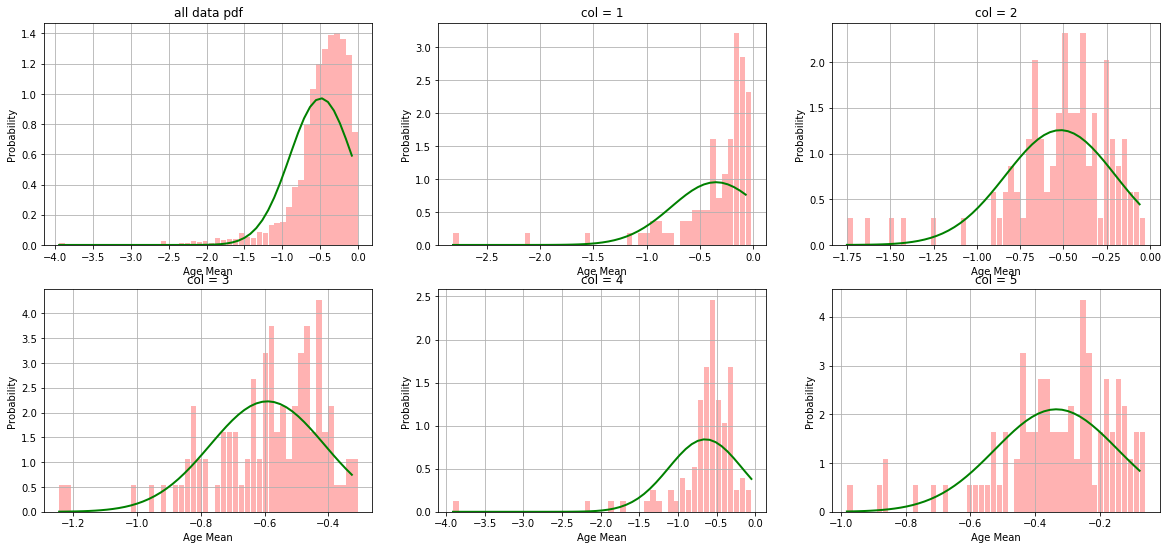

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log


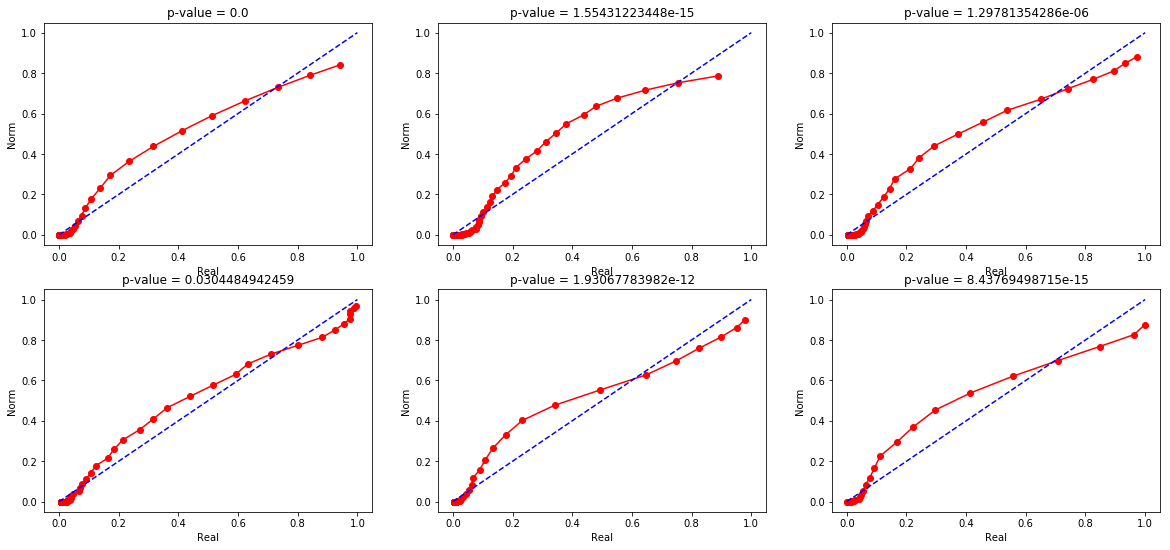

----------------------------------------------------------------------
[无回应比例] 数据取对数处理后的  PDF图绘制及正态性符合测试


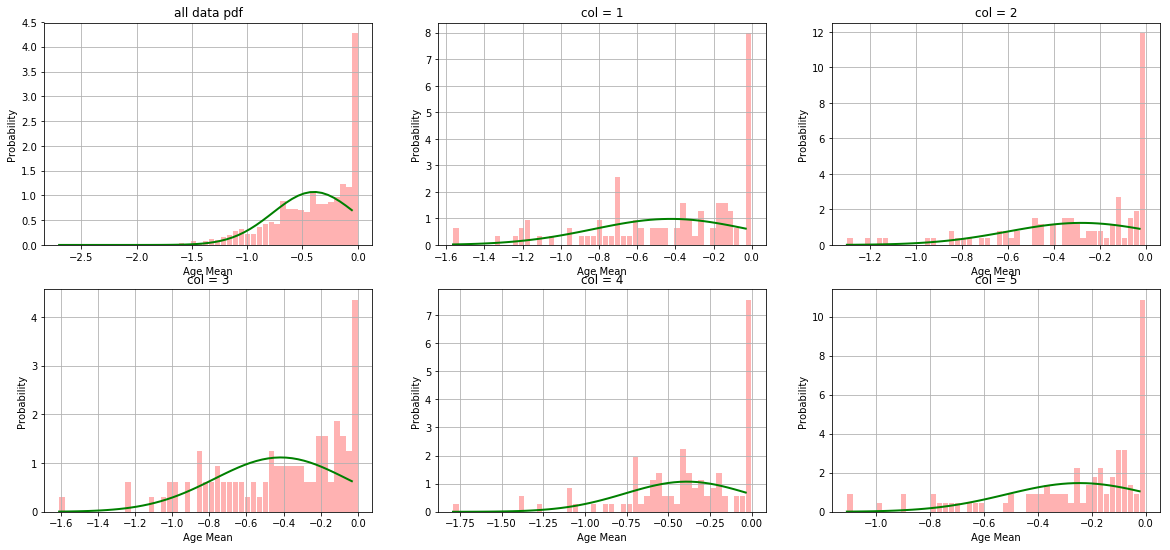

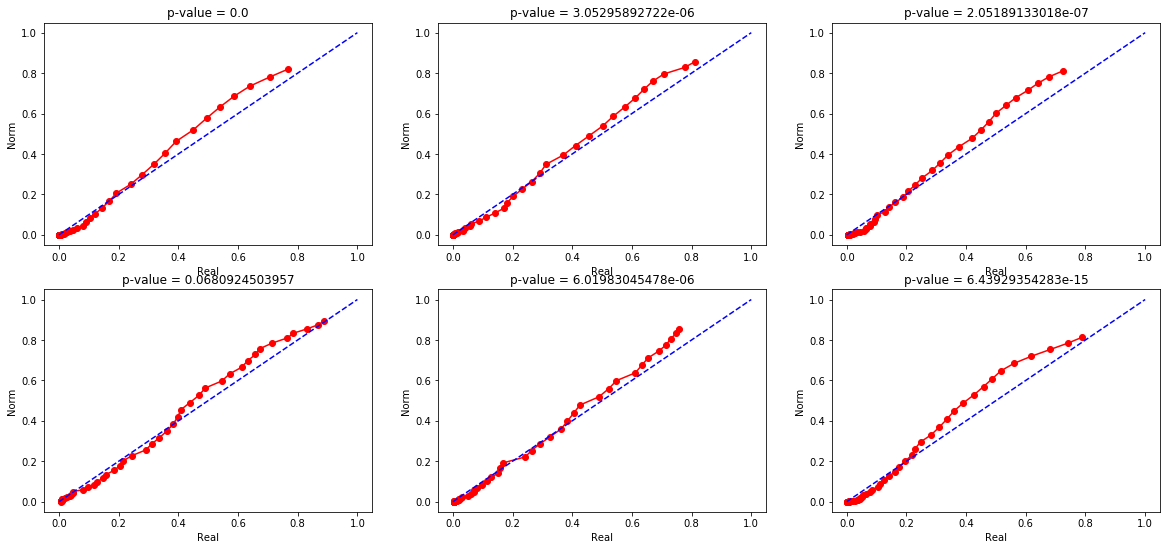

----------------------------------------------------------------------
[地域集中度] 数据取对数处理后的  PDF图绘制及正态性符合测试


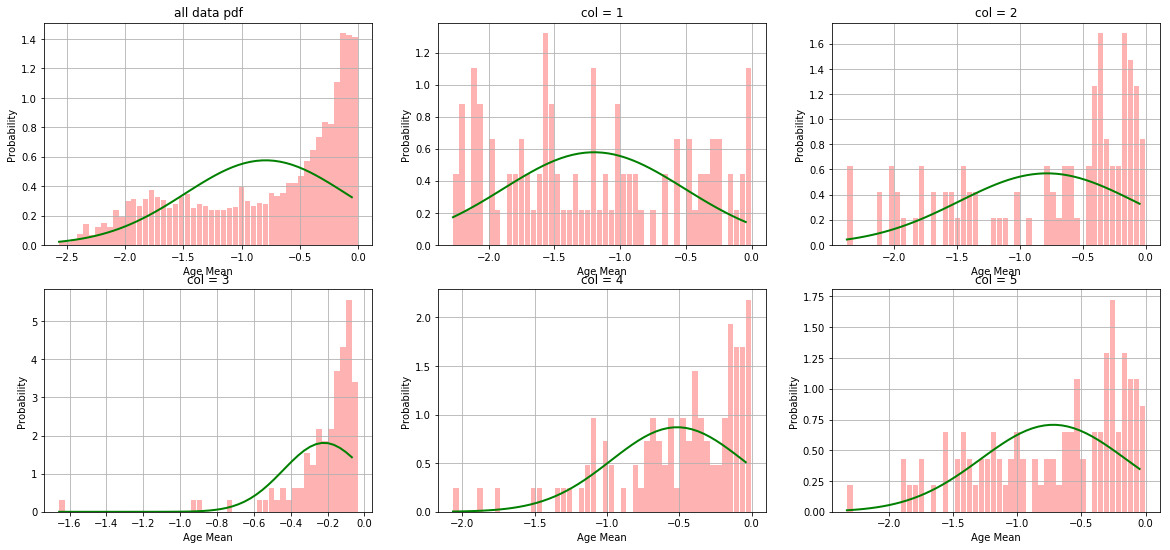

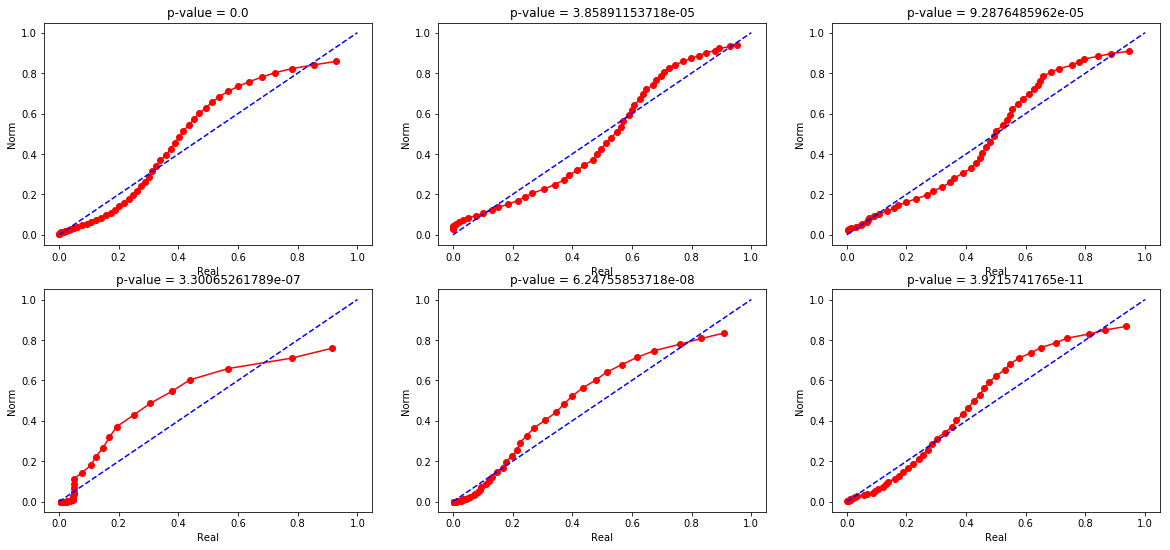

In [193]:
def clear_data(data):
    for ii in range(0,len(data)):
        if np.isinf(data[ii]) :
            data[ii] = max(data)
        elif np.isneginf(data[ii]):
            data[ii] = min(data)
            
    return data

def q_4_is_norm_log(col,size):
    print '----------------------------------------------------------------------'
    print '[' + col + '] 数据取对数处理后的  PDF图绘制及正态性符合测试'
    
    #绘制PDF图
    plt_pdf = plt
    plt_pdf.figure(figsize=(20,9))
    plt_pdf.subplot(2,3,1)
    logdata = clear_data(np.log(df[col]))
    show_data_pdf(plt_pdf,logdata,size)
    plt_pdf.title('all data pdf')

    for i in range(1,6):
        plt_pdf.subplot(2,3,i+1)
        logdata = np.log(df[df['群类别']==i][col])
        logdata = clear_data(logdata.values)
        show_data_pdf(plt_pdf,logdata[:100],size)
        plt_pdf.title('col = '+str(i))
    plt_pdf.show()

    #绘制Q-Q图
    plt_QQ = plt
    plt_QQ.figure(figsize=(20,9))
    plt_QQ.subplot(2,3,1)
    logdata = clear_data(np.log(df[col]))
    p = show_data_is_norm(plt_QQ,logdata,size)
    plt_QQ.title('p-value = ' + str(p))
    
    for i in range(1,6):
        plt_pdf.subplot(2,3,i+1)
        logdata = np.log(df[df['群类别']==i][col])
        logdata = clear_data(logdata.values)
        p = show_data_is_norm(plt_QQ,logdata,size)
        plt_QQ.title('p-value = ' + str(p))
    plt_QQ.show()
    pass

q_4_is_norm_log('性别比',50)
q_4_is_norm_log('无回应比例',50)
q_4_is_norm_log('地域集中度',50)

__由上述产生数据可以定性确认：$[性别比][无回应比例][地域集中度]$三个列在进行了对数转换之后仍然不满足正态分布，无论是整体还是各个分组__     

## 5. How to do one-way ANOVA with the non-normal data? 
### a） Find and list the possible solutions set.

– One-way ANOVA is considered a “robust” test against the normality assumption, and can usually tolerate data that are non-Gaussian (skewed or kurtotic distributions) with a small effect on the Type I error rate.
– Use the non-parametric Kruskal-Wallis H Test

In [348]:
x = [-100 , 1, 3, 5, 7, 9 , 100]
y = [2, 4, 6, 8, 10 ]
print stats.kruskal(x,y)
print stats.f_oneway(x,y)

KruskalResult(statistic=0.1648351648351678, pvalue=0.6847433561373848)
F_onewayResult(statistic=0.0085517127097980428, pvalue=0.92814667933572959)


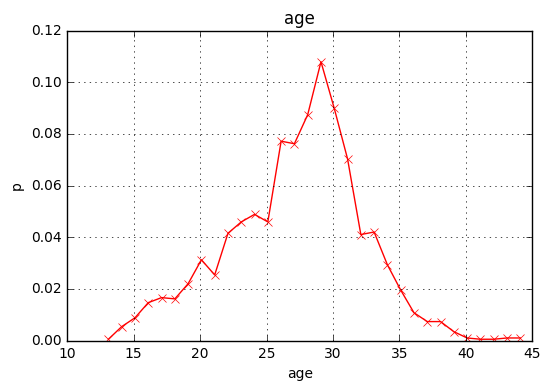

[ 13.09782609  14.09782609  15.09782609  16.09782609  17.09782609
  18.09782609  19.09782609  20.09782609  21.09782609  22.09782609
  23.09782609  24.09782609  25.09782609  26.09782609  27.09782609
  28.09782609  29.09782609  30.09782609  31.09782609  32.09782609
  33.09782609  34.09782609  35.09782609  36.09782609  37.09782609
  38.09782609  39.09782609  40.09782609  41.09782609  42.09782609
  43.09782609  44.09782609]


In [145]:

plt = runplt('age','age','p')
#x = [[6], [8], [10], [14], [18]]
#y = [[7], [9], [13], [17.5], [18]]
#plt.plot(x, y, 'k.')
#plt.show()

x = np.arange(df['平均年龄'].min(),df['平均年龄'].max(),1)
y = []

for i in range(len(x)):
    num = len(df[abs(df['平均年龄']-x[i])<0.5])
    y.append(float(num) / 2048)
y = np.array(y)
plt.plot(x, y, 'rx-')
plt.show()
print x

In [102]:
dir_age = {}
for i in range(1,6):
    dir_age[i] = np.array(df[df['群类别']==i]['平均年龄'].values)
    print i,len(dir_age[i]),dir_age[i].var(ddof=1)
    

1 484 24.243384348
2 300 27.2209588928
3 196 6.51730498073
4 425 25.9922129157
5 635 9.11423302558


In [112]:
import scipy.stats as stats
oneway_arg = []
for i in range(1,6):
    oneway_arg.append( df[df['群类别']==i]['平均年龄'].values )
print stats.f_oneway(*oneway_arg)

stats.norm.pdf(0.05)

F_onewayResult(statistic=171.50703270337274, pvalue=1.0820916125222479e-126)


0.39844391409476404

In [78]:
from scipy.stats import kstest
import numpy as np
 
x = np.random.normal(5,2,1000)
#test_stat = kstest(x, 'norm')
test_stat = kstest(x, 'norm',args=(5,2))

print test_stat

KstestResult(statistic=0.029158506476667956, pvalue=0.35819597960027139)
